# ML 101 Practical Exam

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost.

Sendit is a logistics company with presence all over Sub-Saharan Africa.

The solution will help Sendit enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendit to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

Sendit helps men and women behind every type of business to trade easily, deliver more competitively, and build extraordinary businesses.

Data is a critical component in helping Sendit to build more efficient, affordable and accessible solutions. Given the details of a Sendit order, can you use historic data to predict an accurate time for the arrival of the rider at the destination of a package?  Your task is to build a model that predicts an accurate delivery time, from picking up a package to arriving at the final destination. An accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers.

## The Data

The dataset you have been provided includes order details and rider metrics based on orders made on the Sendit platform. The challenge is to predict the estimated time of arrival for orders- from pick-up to drop-off.


The training dataset provided here is a subset of over 20,000 orders and only includes direct orders (i.e. Sendit “express” orders) with bikes in Lagos. Furthermore, you also have data about the weather, that corresponds to the time of the order.

The necessary files are:
Train.csv - is the dataset that you will use to train your model.
Test.csv - is the dataset on which you will apply your model to.
Riders.csv - contains unique rider Ids, number of orders, age, rating and number of ratings
VariableDefinitions.csv - Definitions of variables in the Train, Test and Riders files

**Variables**
* Order details
* Order No – Unique number identifying the order
* User Id – Unique number identifying the customer on a platform
* Vehicle Type – bikes, however in practice
* Platform Type – Platform used to place the order, there are 4 types
* Personal or Business – Customer type
* Placement times

* Placement - Day of Month i.e 1-31
* Placement - Weekday (Monday = 1)
* Placement - Time - Time of day the order was placed
* Confirmation times

* Confirmation - Day of Month i.e 1-31
* Confirmation - Weekday (Monday = 1)
* Confirmation - Time - time of day the order was confirmed by a rider
* Arrival at Pickup times

* Arrival at Pickup - Day of Month i.e 1-31
* Arrival at Pickup - Weekday (Monday = 1)
* Arrival at Pickup - Time - Time of day the rider arrived at the location to pick up the order - as marked by the rider through the Sendit application
* Pickup times

* Pickup - Day of Month i.e 1-31
* Pickup - Weekday (Monday = 1)
* Pickup - Time - Time of day the rider picked up the order - as marked by the rider through the Sendy application
* Arrival at Destination times (column missing in Test set)

* Arrival at Delivery - Day of Month i.e 1-31
* Arrival at Delivery - Weekday (Monday = 1)
* Arrival at Delivery - Time - Time of day the rider arrived at the destination to deliver the order - as marked by the rider through the Sendit application
* Distance covered (KM) - The distance from Pickup to Destination
* Temperature -Temperature at the time of order placement in Degrees Celsius (measured every three hours)
* Precipitation in Millimeters - Precipitation at the time of order placement (measured every three hours)
* Pickup Latitude and Longitude - Latitude and longitude of pick up location
* Destination Latitude and Longitude - Latitude and longitude of delivery location
* Rider ID – ID of the Rider who accepted the order
* Time from Pickup to Arrival - Time in seconds between ‘Pickup’ and ‘Arrival at Destination’ - calculated from the columns for the purpose of facilitating the task
***Rider metrics***
* Rider ID – Unique number identifying the rider (same as in order details)
* No of Orders – Number of Orders the rider has delivered
* Age – Number of days since the rider delivered the first order
* Average Rating – Average rating of the rider
* No of Ratings - Number of ratings the rider has received. Rating an order is optional for the customer.

Using any regression algorithm of your choice, build a model that can accurately predict delivery time and use your model on the test data set.
Save your test prediction result as a csv in the format of the sample submission file you have been provided. Good luck!

In [7]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
import catboost
%matplotlib inline

ModuleNotFoundError: No module named 'catboost'

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.  Downloading catboost-0.24.4-cp38-none-win_amd64.whl (65.4 MB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=cba23f4b0e7c1ee00cbdd2e50845b085eaea3a9f3fbf225db13ecfe4484727c8
  Stored in directory: c:\users\olubayode\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying



In [2]:
data= pd.read_csv('Train.csv')
rider_data = pd.read_csv('Riders.csv')
test_data= pd.read_csv('Test.csv')


In [3]:
data.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [4]:
rider_data.head(2)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176


In [5]:
#rider_data.drop(['id','Vintage'], axis =1, inplace = True)

In [6]:
#rider_data

In [7]:
#comb_data = data.append(rider_data)
#print(comb)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [9]:
rider_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [11]:
rider_group= data.groupby('Rider Id')['Placement - Weekday (Mo = 1)']

In [12]:
rider_group.mean()

Rider Id
Rider_Id_0      1.000000
Rider_Id_1      5.000000
Rider_Id_10     3.607843
Rider_Id_100    3.252525
Rider_Id_101    3.311475
                  ...   
Rider_Id_959    2.478261
Rider_Id_96     3.048077
Rider_Id_97     3.285714
Rider_Id_98     2.500000
Rider_Id_99     2.813559
Name: Placement - Weekday (Mo = 1), Length: 924, dtype: float64

In [13]:
data['Rider Id'].value_counts()

Rider_Id_726    247
Rider_Id_576    223
Rider_Id_523    199
Rider_Id_101    183
Rider_Id_205    182
               ... 
Rider_Id_149      1
Rider_Id_182      1
Rider_Id_29       1
Rider_Id_392      1
Rider_Id_602      1
Name: Rider Id, Length: 924, dtype: int64

### Join the raider data and the train data

In [14]:
#data  = data.set_index('Rider Id')
#data.drop_duplicates(inplace=True)
#rider_data  = rider_data.set_index('Rider Id')
#comb_data  = data.join(rider_data,how='outer')

In [15]:
#comb_data

In [16]:
#comb_data.info()

In [17]:
#comb_data = comb_data.reset_index()

In [18]:
#comb_data.head(2)

In [19]:
#sns.heatmap(comb_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:

#comb_data.drop('Precipitation in millimeters',axis=1,inplace=True)

In [21]:
#sns.heatmap(comb_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#comb_data.drop('Temperature',axis=1,inplace=True)

In [23]:
#sns.heatmap(comb_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
#comb_data.info()

In [25]:
#comb_data= comb_data.dropna()

In [26]:
#comb_data.info()

In [27]:
#comb_data.head()

In [28]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [29]:
data.drop(['Order No','User Id','Vehicle Type', 'Personal or Business', 'Rider Id'],axis=1,inplace=True)

In [30]:
test_data.drop(['Order No','User Id','Vehicle Type', 'Personal or Business', 'Rider Id'],axis=1,inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Platform Type                              21201 non-null  int64  
 1   Placement - Day of Month                   21201 non-null  int64  
 2   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 3   Placement - Time                           21201 non-null  object 
 4   Confirmation - Day of Month                21201 non-null  int64  
 5   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 6   Confirmation - Time                        21201 non-null  object 
 7   Arrival at Pickup - Day of Month           21201 non-null  int64  
 8   Arrival at Pickup - Weekday (Mo = 1)       21201 non-null  int64  
 9   Arrival at Pickup - Time                   21201 non-null  object 
 10  Pickup - Day of Month 

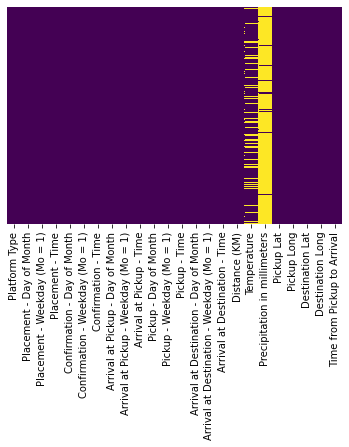

In [32]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

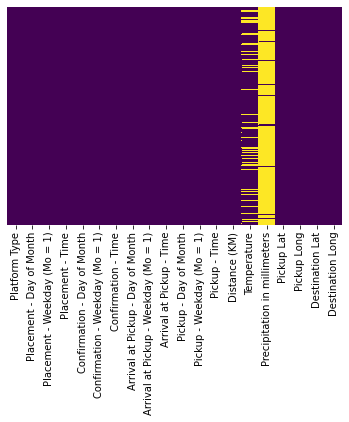

In [33]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
data.drop('Precipitation in millimeters',axis=1,inplace=True)
test_data.drop('Precipitation in millimeters',axis=1,inplace=True)

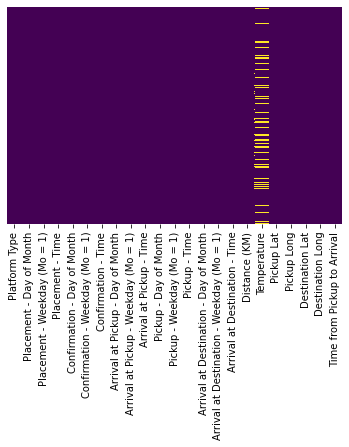

In [35]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

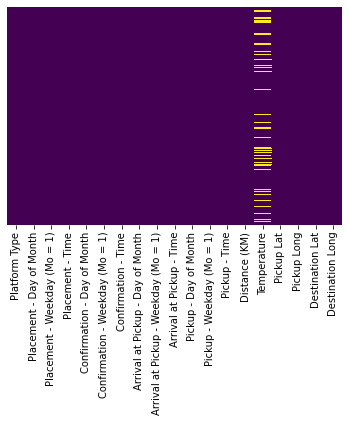

In [36]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
data.drop('Temperature',axis=1,inplace=True)
test_data.drop('Temperature',axis=1,inplace=True)

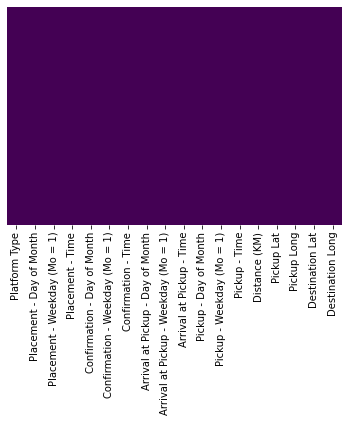

In [38]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

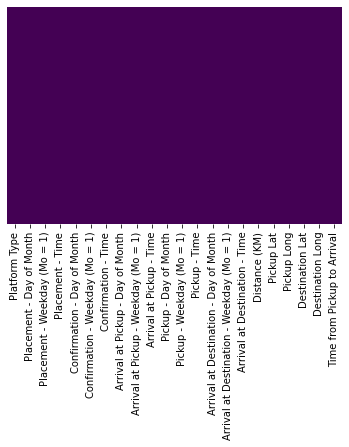

In [39]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Platform Type                              21201 non-null  int64  
 1   Placement - Day of Month                   21201 non-null  int64  
 2   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 3   Placement - Time                           21201 non-null  object 
 4   Confirmation - Day of Month                21201 non-null  int64  
 5   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 6   Confirmation - Time                        21201 non-null  object 
 7   Arrival at Pickup - Day of Month           21201 non-null  int64  
 8   Arrival at Pickup - Weekday (Mo = 1)       21201 non-null  int64  
 9   Arrival at Pickup - Time                   21201 non-null  object 
 10  Pickup - Day of Month 

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Platform Type                              21201 non-null  int64  
 1   Placement - Day of Month                   21201 non-null  int64  
 2   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 3   Placement - Time                           21201 non-null  object 
 4   Confirmation - Day of Month                21201 non-null  int64  
 5   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 6   Confirmation - Time                        21201 non-null  object 
 7   Arrival at Pickup - Day of Month           21201 non-null  int64  
 8   Arrival at Pickup - Weekday (Mo = 1)       21201 non-null  int64  
 9   Arrival at Pickup - Time                   21201 non-null  object 
 10  Pickup - Day of Month 

In [42]:
data.head(1)

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,...,Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,3,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,...,10:27:30 AM,9,5,10:39:55 AM,4,-1.317755,36.83037,-1.300406,36.829741,745


In [46]:
data.drop(['Placement - Day of Month','Placement - Weekday (Mo = 1)','Placement - Time','Confirmation - Time', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time', 'Pickup - Time','Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)',
               'Arrival at Destination - Time'],axis=1,inplace=True)

In [47]:
data.head(1)

,Platform Type,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,3,9,5,9,5,4,-1.317755,36.83037,-1.300406,36.829741,745


In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Platform Type                         7068 non-null   int64  
 1   Placement - Day of Month              7068 non-null   int64  
 2   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 3   Placement - Time                      7068 non-null   object 
 4   Confirmation - Day of Month           7068 non-null   int64  
 5   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 6   Confirmation - Time                   7068 non-null   object 
 7   Arrival at Pickup - Day of Month      7068 non-null   int64  
 8   Arrival at Pickup - Weekday (Mo = 1)  7068 non-null   int64  
 9   Arrival at Pickup - Time              7068 non-null   object 
 10  Pickup - Day of Month                 7068 non-null   int64  
 11  Pickup - Weekday 

In [50]:
test_data.drop(['Placement - Day of Month','Placement - Weekday (Mo = 1)','Placement - Time','Confirmation - Time', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time', 'Pickup - Time'],axis=1,inplace=True)

In [51]:
test_data.head(1)

,Platform Type,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long
0,3,27,3,27,3,8,-1.333275,36.870815,-1.305249,36.82239


In [52]:
corr = data.corr()
display(corr)

,Platform Type,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Platform Type,1.000000,0.012770,-0.058005,0.012770,-0.058005,0.005528,-0.002742,0.021327,0.006319,0.043924,-0.003827
Confirmation - Day of Month,0.012770,1.000000,0.026123,1.000000,0.026123,-0.007587,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Confirmation - Weekday (Mo = 1),-0.058005,0.026123,1.000000,0.026123,1.000000,0.003574,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Pickup - Day of Month,0.012770,1.000000,0.026123,1.000000,0.026123,-0.007587,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Pickup - Weekday (Mo = 1),-0.058005,0.026123,1.000000,0.026123,1.000000,0.003574,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Distance (KM),0.005528,-0.007587,0.003574,-0.007587,0.003574,1.000000,-0.124338,0.178537,-0.079366,0.135397,0.580608
Pickup Lat,-0.002742,-0.004923,-0.000883,-0.004923,-0.000883,-0.124338,1.000000,-0.147629,0.114975,0.051399,-0.053823
Pickup Long,0.021327,-0.005448,0.011036,-0.005448,0.011036,0.178537,-0.147629,1.000000,0.014992,0.082803,0.060285
Destination Lat,0.006319,0.007550,-0.004251,0.007550,-0.004251,-0.079366,0.114975,0.014992,1.000000,0.046767,-0.061872
Destination Long,0.043924,0.002073,-0.000900,0.002073,-0.000900,0.135397,0.051399,0.082803,0.046767,1.000000,0.070425


In [53]:
corr = test_data.corr()
display(corr)

,Platform Type,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long
Platform Type,1.000000,0.017555,-0.060424,0.017555,-0.060424,0.007366,-0.005354,0.015143,0.007290,0.037805
Confirmation - Day of Month,0.017555,1.000000,0.017254,1.000000,0.017254,0.015146,-0.005642,0.019199,-0.007287,0.006075
Confirmation - Weekday (Mo = 1),-0.060424,0.017254,1.000000,0.017254,1.000000,0.027008,0.003722,0.008954,0.023705,-0.001050
Pickup - Day of Month,0.017555,1.000000,0.017254,1.000000,0.017254,0.015146,-0.005642,0.019199,-0.007287,0.006075
Pickup - Weekday (Mo = 1),-0.060424,0.017254,1.000000,0.017254,1.000000,0.027008,0.003722,0.008954,0.023705,-0.001050
Distance (KM),0.007366,0.015146,0.027008,0.015146,0.027008,1.000000,-0.140774,0.185876,-0.068135,0.175951
Pickup Lat,-0.005354,-0.005642,0.003722,-0.005642,0.003722,-0.140774,1.000000,-0.165307,0.091665,0.051783
Pickup Long,0.015143,0.019199,0.008954,0.019199,0.008954,0.185876,-0.165307,1.000000,0.021234,0.078977
Destination Lat,0.007290,-0.007287,0.023705,-0.007287,0.023705,-0.068135,0.091665,0.021234,1.000000,0.036210
Destination Long,0.037805,0.006075,-0.001050,0.006075,-0.001050,0.175951,0.051783,0.078977,0.036210,1.000000


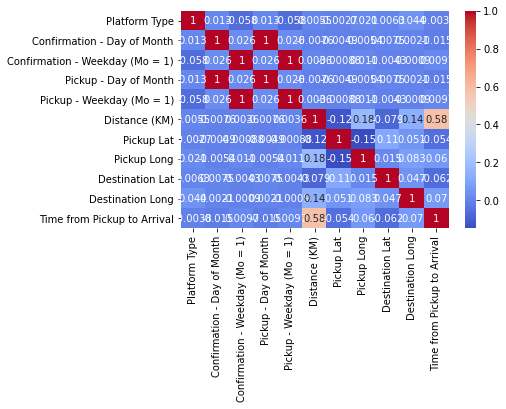

In [54]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

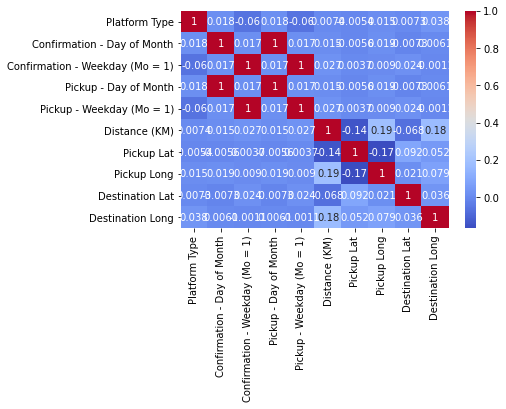

In [55]:
sns.heatmap(test_data.corr(),cmap='coolwarm',annot=True)

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


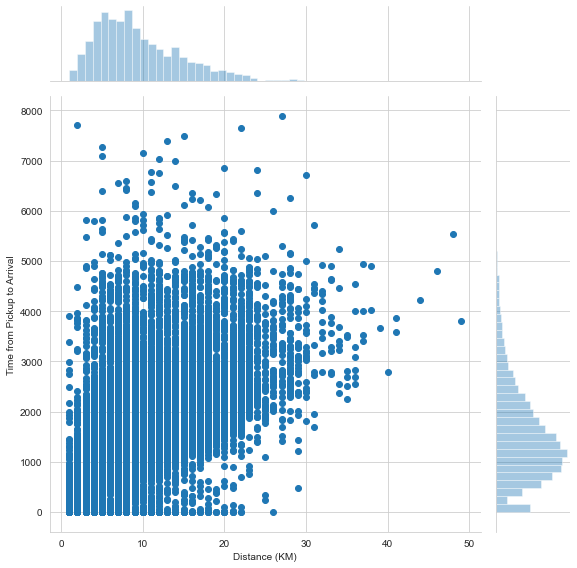

In [56]:
sns.set_style('whitegrid')
sns.jointplot(x='Distance (KM)',y='Time from Pickup to Arrival',data=data, size=8)


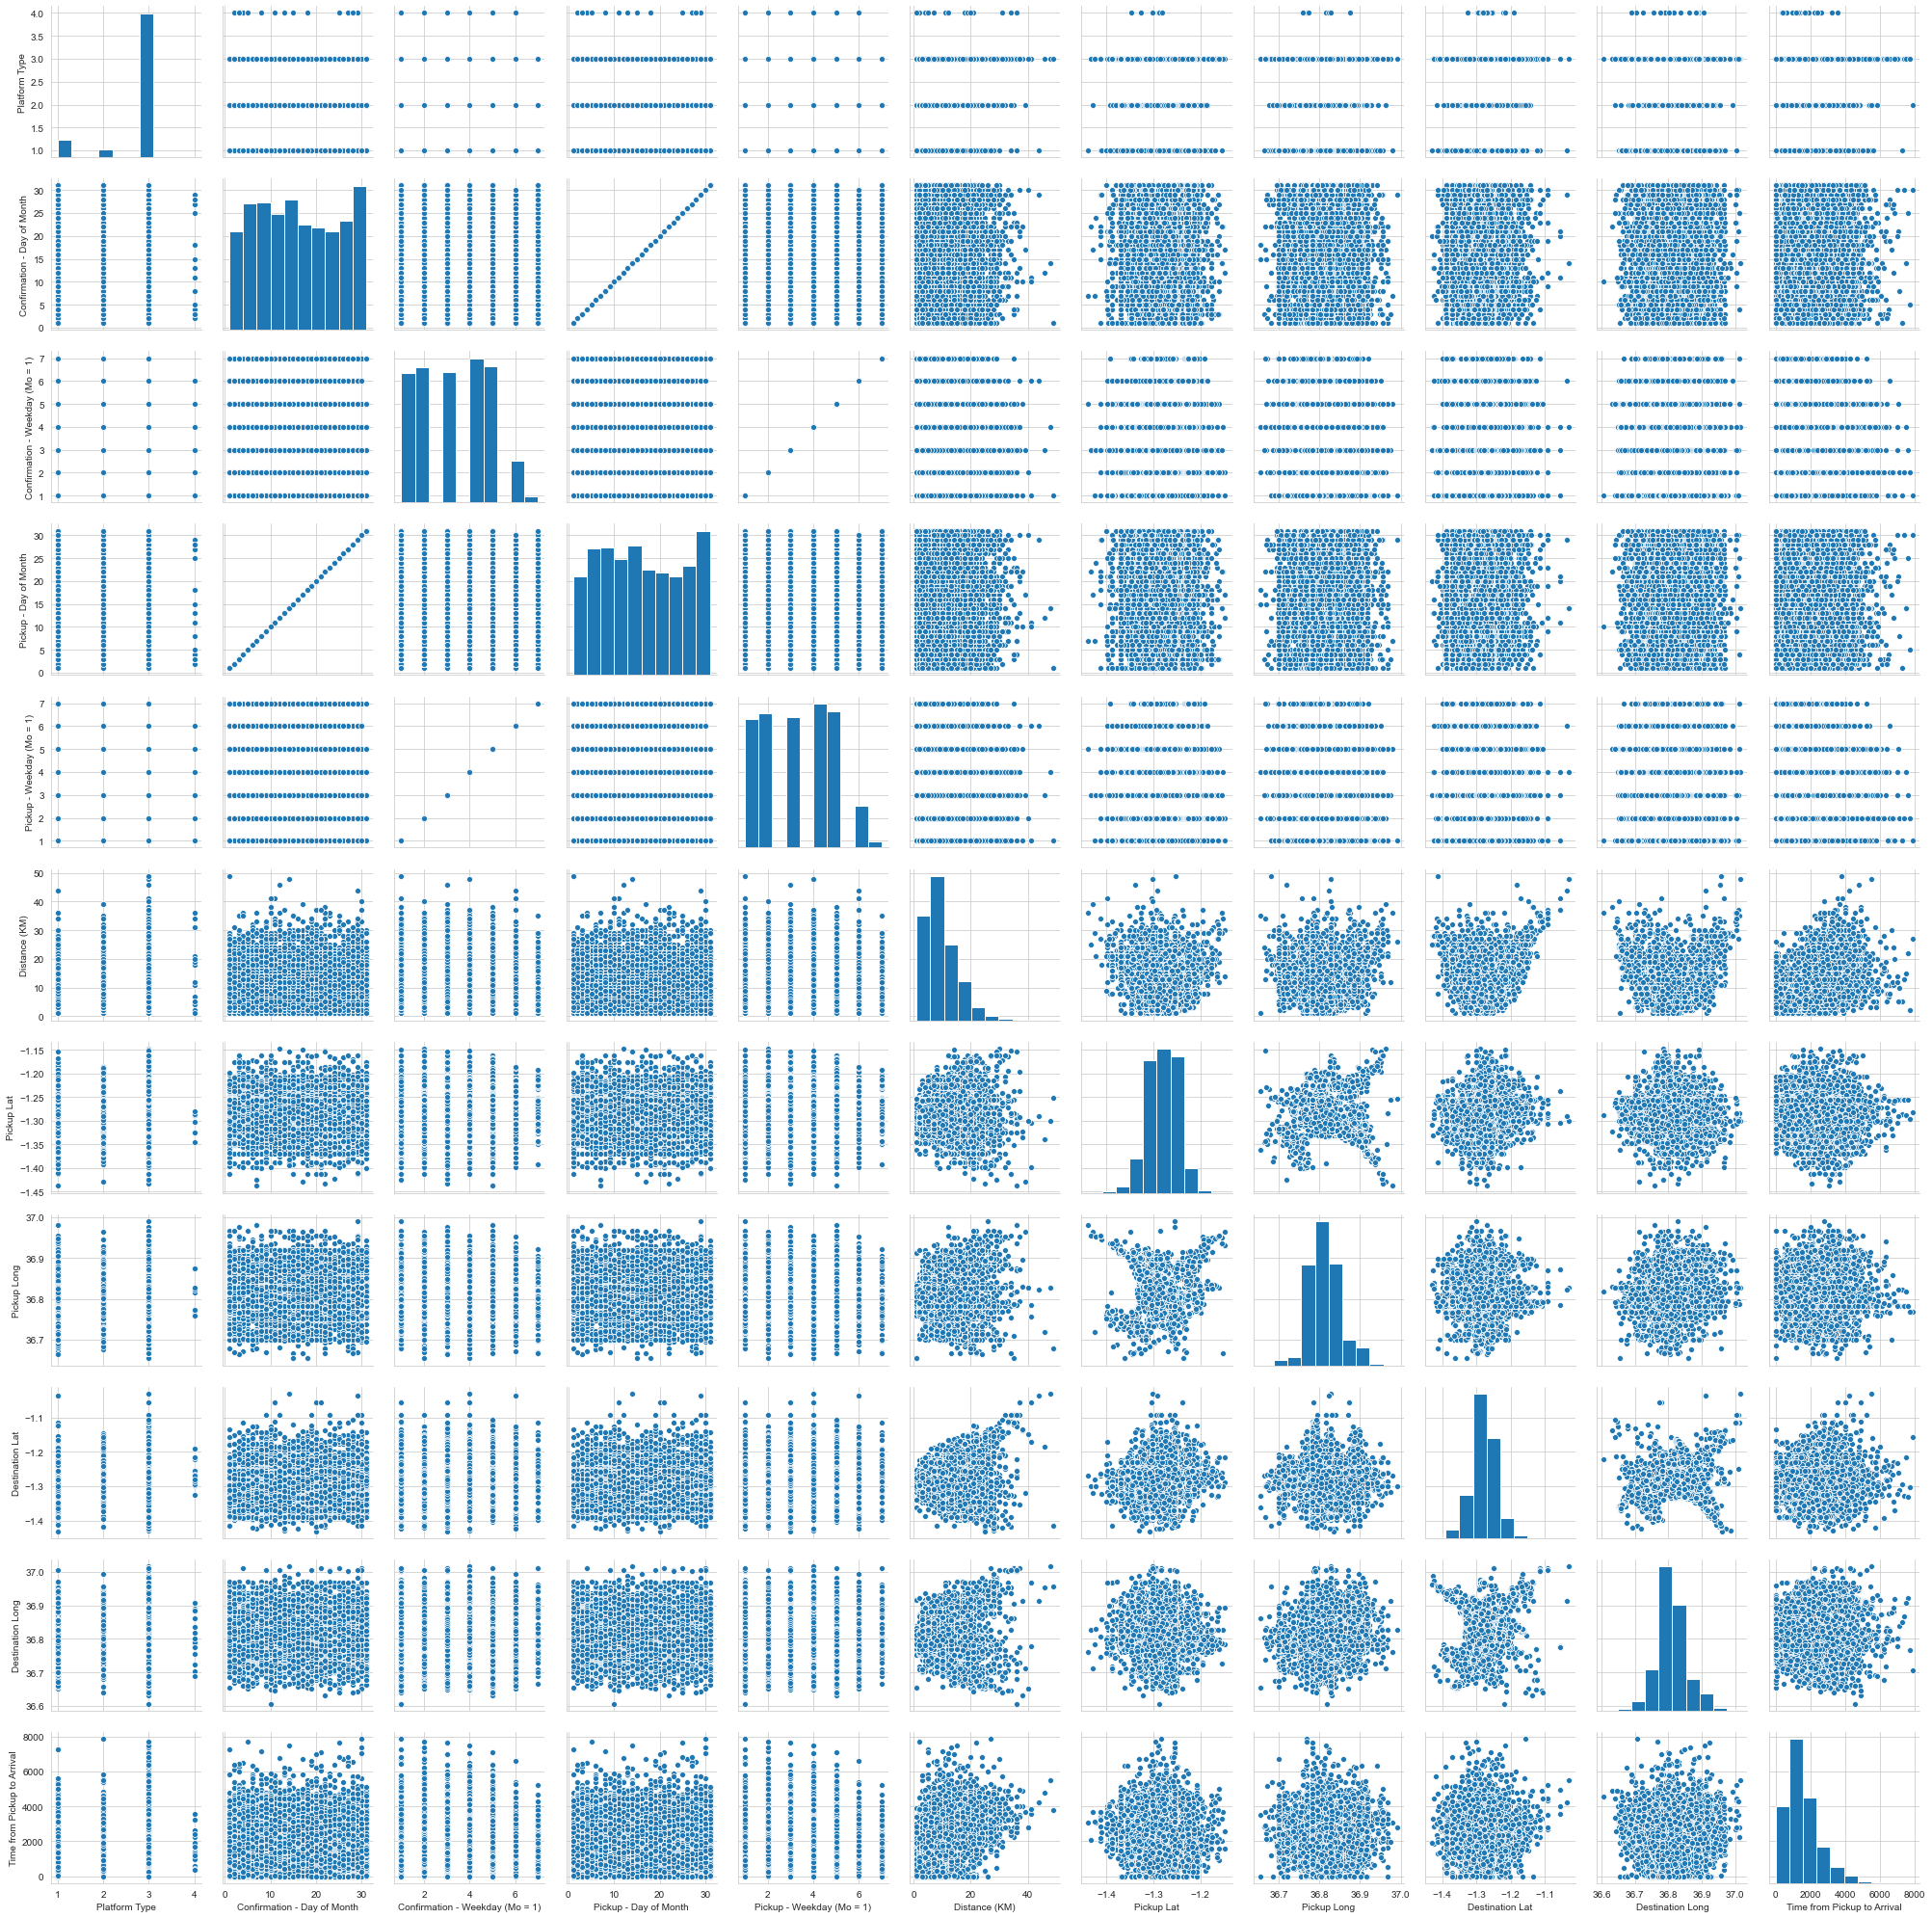

In [59]:
sns.pairplot(data)

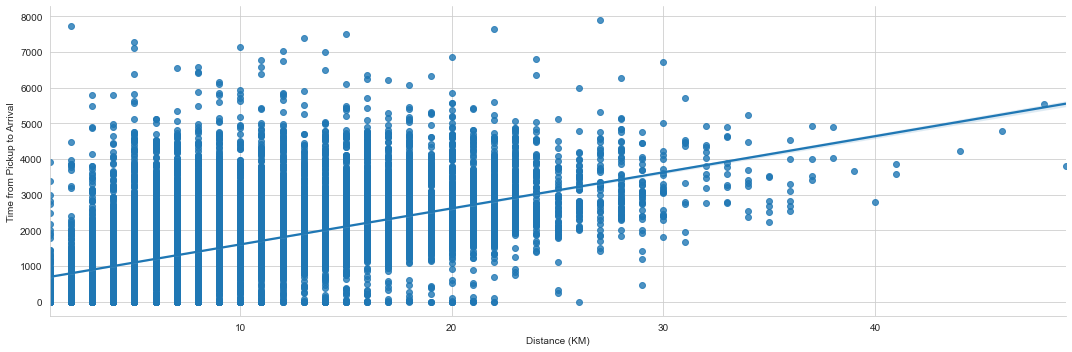

In [61]:
sns.lmplot(x='Distance (KM)', y='Time from Pickup to Arrival', data=data, aspect=3)

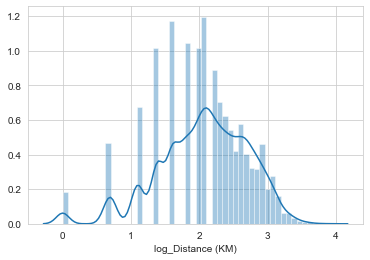

In [78]:
data['log_Distance (KM)'] = np.log(data['Distance (KM)'])
sns.distplot(data['log_Distance (KM)'])

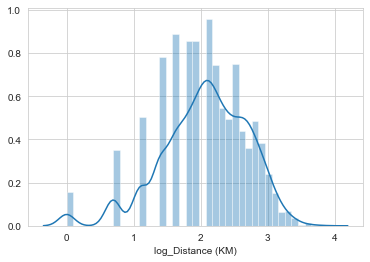

In [81]:
test_data['log_Distance (KM)'] = np.log(test_data['Distance (KM)'])
sns.distplot(test_data['log_Distance (KM)'])

In [105]:
data['log_Time from Pickup to Arrival'] = np.log(data['Time from Pickup to Arrival'])


In [106]:
X=data[['log_Distance (KM)']]


In [107]:
y=data[['Time from Pickup to Arrival']]

In [108]:
test_X=test_data[['log_Distance (KM)']]

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
mod= LinearRegression()

In [112]:
mod.fit(X_train, y_train)

LinearRegression()

In [113]:
print('coefficient: \n', mod.coef_)

coefficient: 
 [[857.81178322]]


In [114]:
print('intercept: \n', mod.intercept_)

intercept: 
 [-210.31439245]


In [115]:
predicted=  mod.predict( X_test)


In [116]:
predicted

array([[2112.68297962],
       [1326.67799296],
       [ 978.86524554],
       ...,
       [1458.91026251],
       [1921.26781195],
       [ 978.86524554]])

In [117]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 575.8586248554255
MSE: 655203.1622760525
RMSE: 809.4462071540347


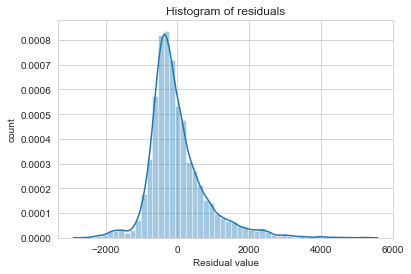

In [119]:
def hist_resids(y_test, predicted):
    
    resids = np.subtract(y_test, predicted)
    
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, predicted)    

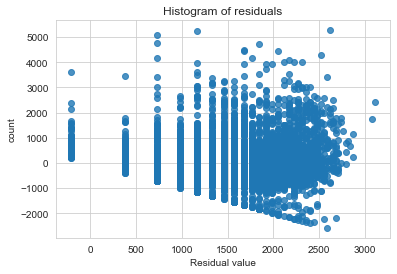

In [120]:
def hist_resids(y_test, predicted):
    
    resids = np.subtract(y_test, predicted)
    
    
    sns.regplot(predicted, resids, fit_reg=False)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, predicted) 


In [121]:
predicted_new_dia = mod.predict(test_X)

In [122]:
predicted_new_dia

array([[1573.45506453],
       [1170.28041321],
       [1170.28041321],
       ...,
       [1764.8702322 ],
       [2269.08055937],
       [1573.45506453]])

In [127]:
predicted_new_dia_ = np.exp(predicted_new_dia)
predicted_new_dia_

array([[inf],
       [inf],
       [inf],
       ...,
       [inf],
       [inf],
       [inf]])